In [8]:
import torch
import matplotlib.pyplot as plt

In [9]:
def differentiable_circle(x, y, center, radius, alpha = 100):
    
    distance = torch.sqrt((x - center[0]) ** 2 + (y - center[1]) ** 2)
    return torch.sigmoid(-alpha * (distance - radius))

# Crear una cuadrícula de puntos

x, y = torch.meshgrid(torch.linspace(-1, 1, 100), torch.linspace(-1, 1, 100))

center = torch.tensor([0.0, 0.0], requires_grad = True)  
radius = torch.tensor(0.5, requires_grad = True)   

center2 = torch.tensor([0.5, 0.0], requires_grad = True)  
radius2 = torch.tensor(0.3, requires_grad = True)

# Imagen de círculo con bordes suaves

circle_image = differentiable_circle(x, y, center, radius)
circle_image2 = differentiable_circle(x, y, center2, radius2)

image = circle_image + circle_image2
image = torch.sigmoid(image)
image.sum().backward()

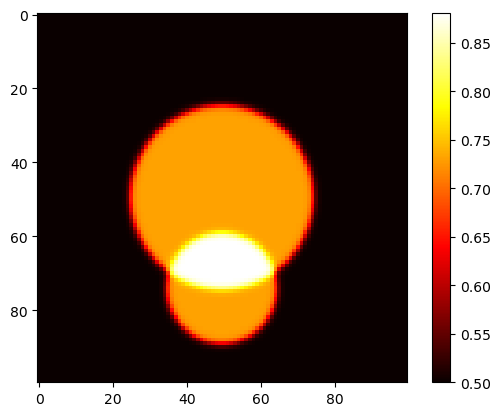

In [10]:
plt.imshow(image.detach().numpy(), cmap = "hot")
plt.colorbar()

In [11]:
def differentiable_rectangle(x, y, bottom_left, top_right, alpha=100):
    
    left = torch.sigmoid(alpha * (x - bottom_left[0]))
    right = torch.sigmoid(alpha * (top_right[0] - x))
    bottom = torch.sigmoid(alpha * (y - bottom_left[1]))
    top = torch.sigmoid(alpha * (top_right[1] - y))

    return left * right * bottom * top

# Crear una cuadrícula de puntos
x, y = torch.meshgrid(torch.linspace(-1, 1, 100), torch.linspace(-1, 1, 100))
bottom_left = torch.tensor([-0.5, -0.5], requires_grad=True)  # Esquina inferior izquierda
top_right = torch.tensor([0.5, 0.5], requires_grad=True)      # Esquina superior derecha

# Imagen de rectángulo con bordes suaves
rectangle_image = differentiable_rectangle(x, y, bottom_left, top_right)
rectangle_image.sum().backward()  # Calcula gradiente

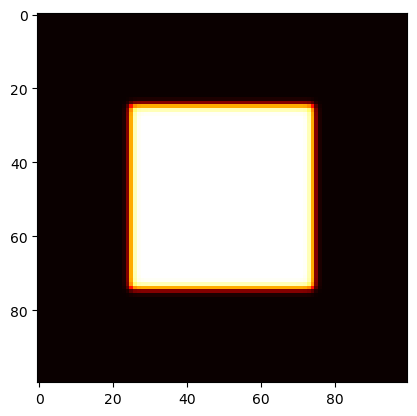

In [12]:
plt.imshow(rectangle_image.detach().numpy(), cmap = "hot")

In [16]:
def distance(x, y, center):
    
    '''computa la distancia euclidea (diferenciable) de (x,y) al centro'''

    distance = torch.sqrt((x - center[0]) ** 2 + (y - center[1]) ** 2)
    return distance

In [24]:
def circle(x, y, center, radius, alpha = 100):                                  # SOLUCION SACAR <---

    '''devuelve 1.0 si (x,y) está dentro del círculo y 0.0 si está fuera'''

    d = distance(x, y, center)
    return smooth_if(d - radius, 0.0, 1.0, alpha)

In [25]:
x, y = torch.meshgrid(torch.linspace(-1, 1, 100), torch.linspace(-1, 1, 100))

In [ ]:
center = torch.tensor([0,0], dtype = torch.float)
center2 = torch.tensor([0.3,0.3], dtype = torch.float)

image = distance(x, y, center2)

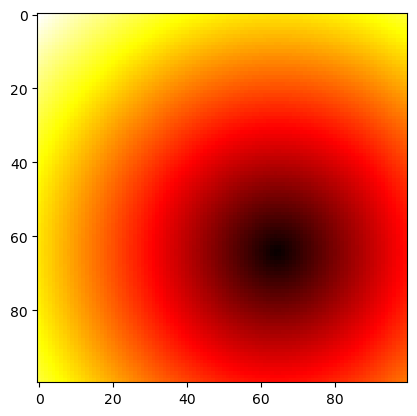

In [31]:
plt.imshow(image.detach().numpy(), cmap = "hot")